In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [6]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [7]:
# Reading file from Data folder
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

In [8]:
# Checking the first ten records
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
# 1. Descriptive Statistics on Headline Length
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [11]:
# 2. Article Count per Publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


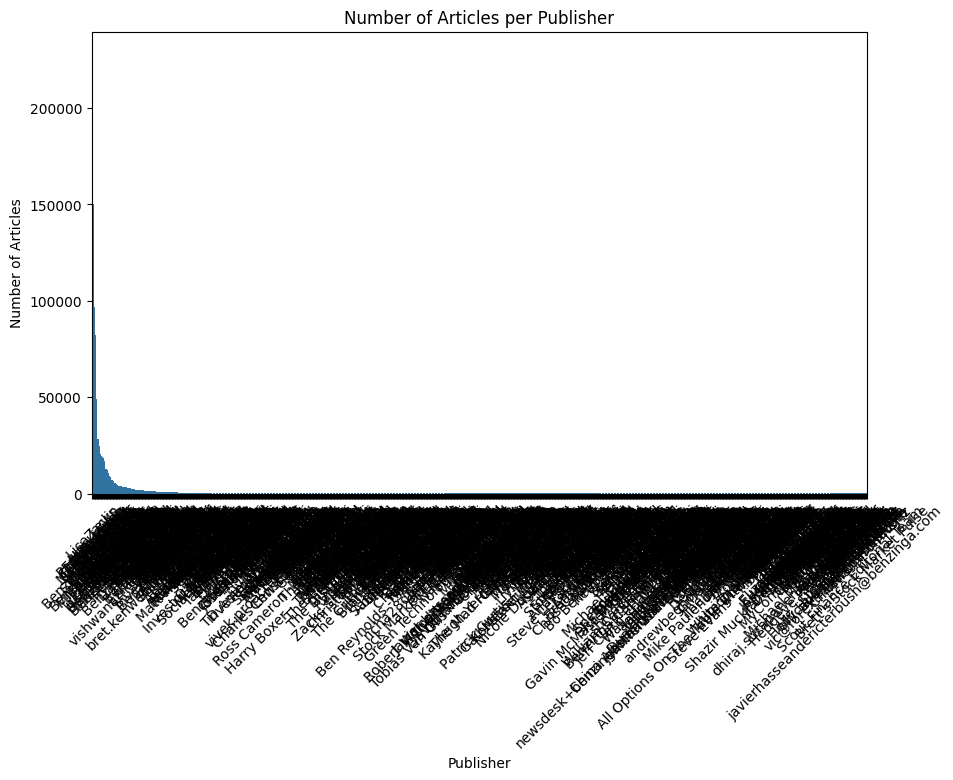

In [12]:
# Plot the article count per publisher
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 3. Analysis of Publication Dates
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if the conversion was successful and drop rows where conversion failed
df = df.dropna(subset=['date'])

# Group by day and count the number of articles published
daily_counts = df.groupby(df['date'].dt.date).size()

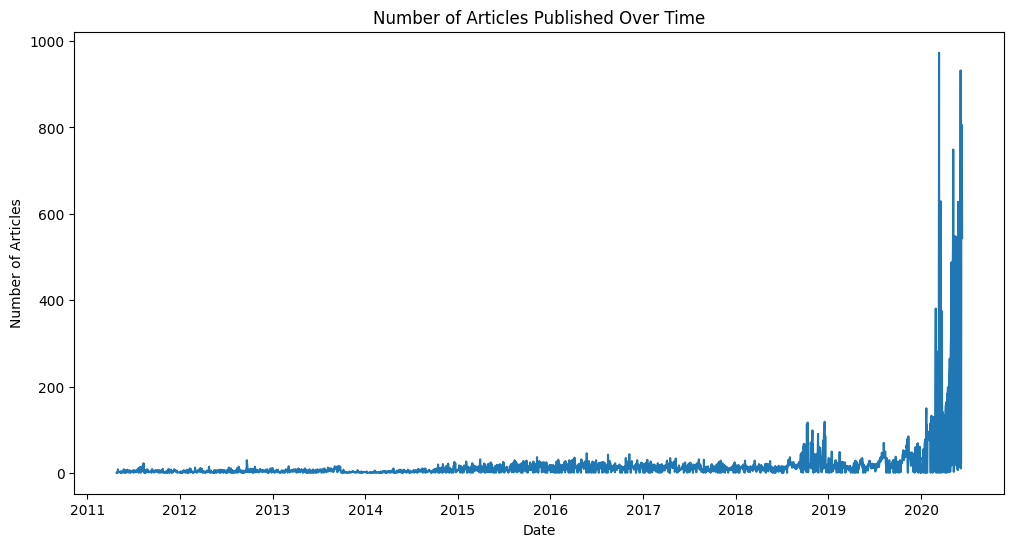

In [14]:
# Display the daily publication trend
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

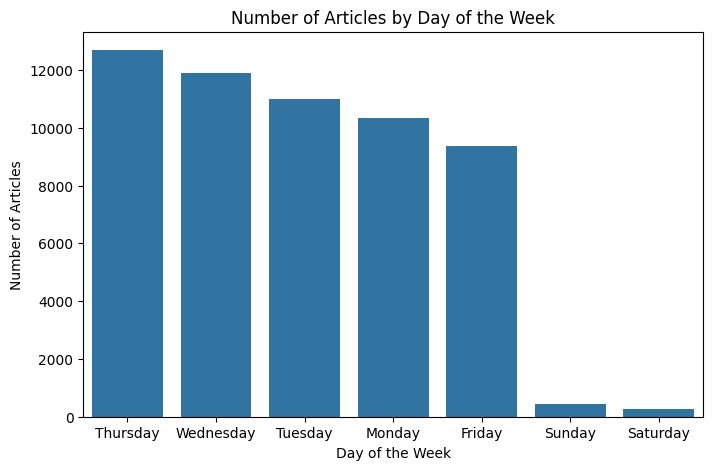

In [15]:
# Analyze trends by day of the week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_counts = df['day_of_week'].value_counts()

# Plot the number of articles by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

* Text Analysis(Topic Modeling):
Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

In [17]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud


# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')


import nltk
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_vader(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the headlines
df['Sentiment_Scores'] = df['headline'].apply(get_sentiment_vader)

# Extract compound score for simplicity
df['Sentiment'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])

# Categorize sentiment
df['Sentiment_Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Inspect the results
print(df[['headline', 'Sentiment', 'Sentiment_Category']].head())

                                            headline  Sentiment  \
0            Stocks That Hit 52-Week Highs On Friday      0.000   
1         Stocks That Hit 52-Week Highs On Wednesday      0.000   
2                      71 Biggest Movers From Friday      0.000   
3       46 Stocks Moving In Friday's Mid-Day Session      0.000   
4  B of A Securities Maintains Neutral on Agilent...      0.296   

  Sentiment_Category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4           Positive  


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...


True

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10)

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['headline'])

# Get the feature names
feature_names = tfidf.get_feature_names_out()

# Sum the TF-IDF scores for each feature over all documents
sum_tfidf = tfidf_matrix.sum(axis=0)

# Extract keywords with their scores
keywords = [(feature_names[i], sum_tfidf[0, i]) for i in range(len(feature_names))]

# Sort keywords by their scores in descending order
keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

# Display the keywords
keywords

[('stocks', np.float64(7269.638017193966)),
 ('eps', np.float64(5317.562660718611)),
 ('shares', np.float64(5143.256566914124)),
 ('week', np.float64(4852.201880476957)),
 ('price', np.float64(4838.983446921662)),
 ('52', np.float64(4543.8144127732785)),
 ('market', np.float64(4166.71772800387)),
 ('trading', np.float64(3836.654229227092)),
 ('hit', np.float64(3358.1115828840016)),
 ('companies', np.float64(2851.811784321508))]

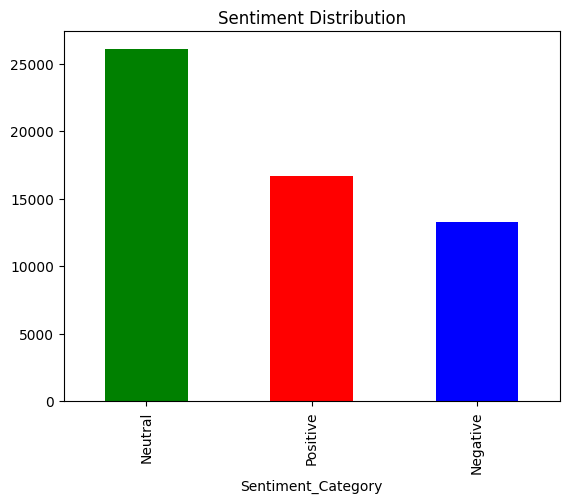

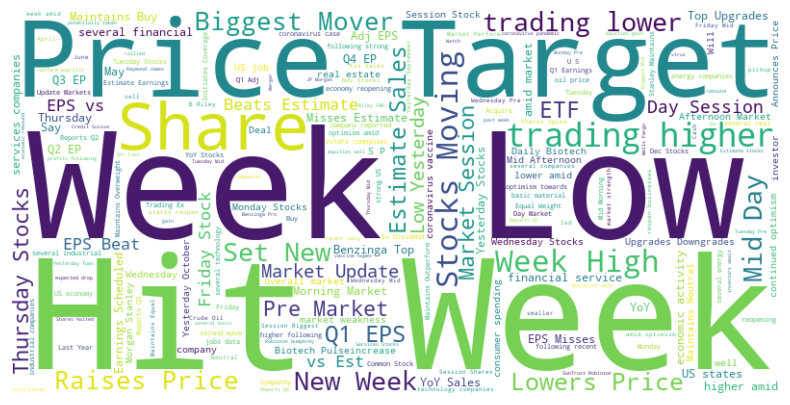

In [21]:
# Sentiment distribution plot
df['Sentiment_Category'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

# Word Cloud for all tokens
all_words = ' '.join(df['headline']).split()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Time Series Analysis:
How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

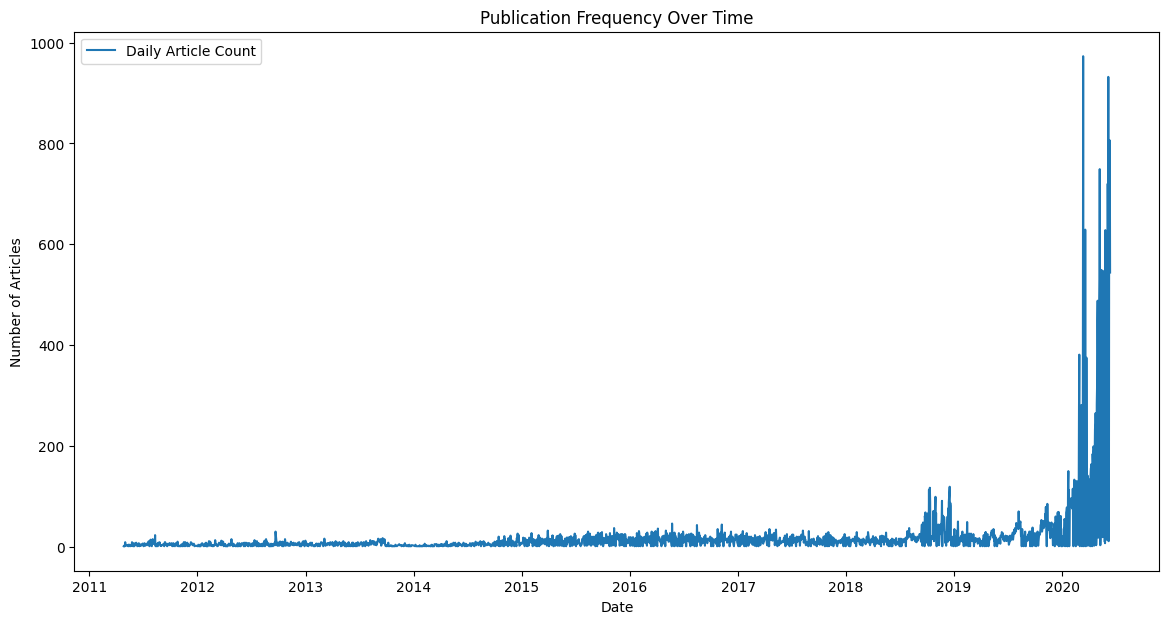

In [22]:
# Plot publication frequency over time
plt.figure(figsize=(14, 7))
plt.plot(daily_counts, label='Daily Article Count')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

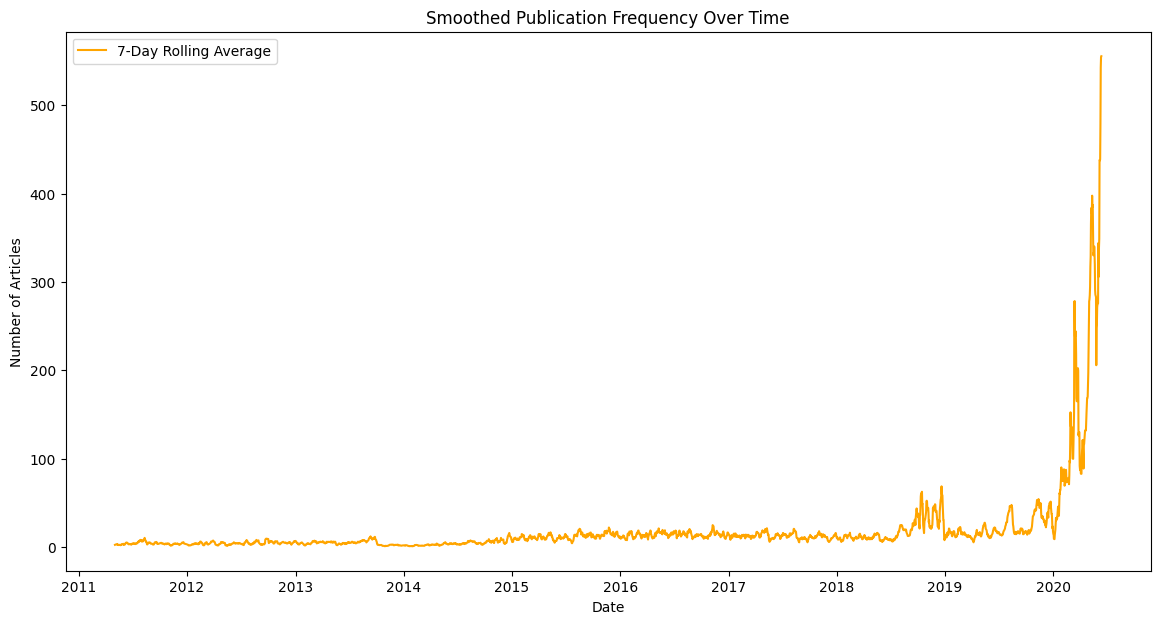

In [23]:
# Apply a rolling average (e.g., 7 days) to smooth the data
rolling_avg = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(rolling_avg, label='7-Day Rolling Average', color='orange')
plt.title('Smoothed Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

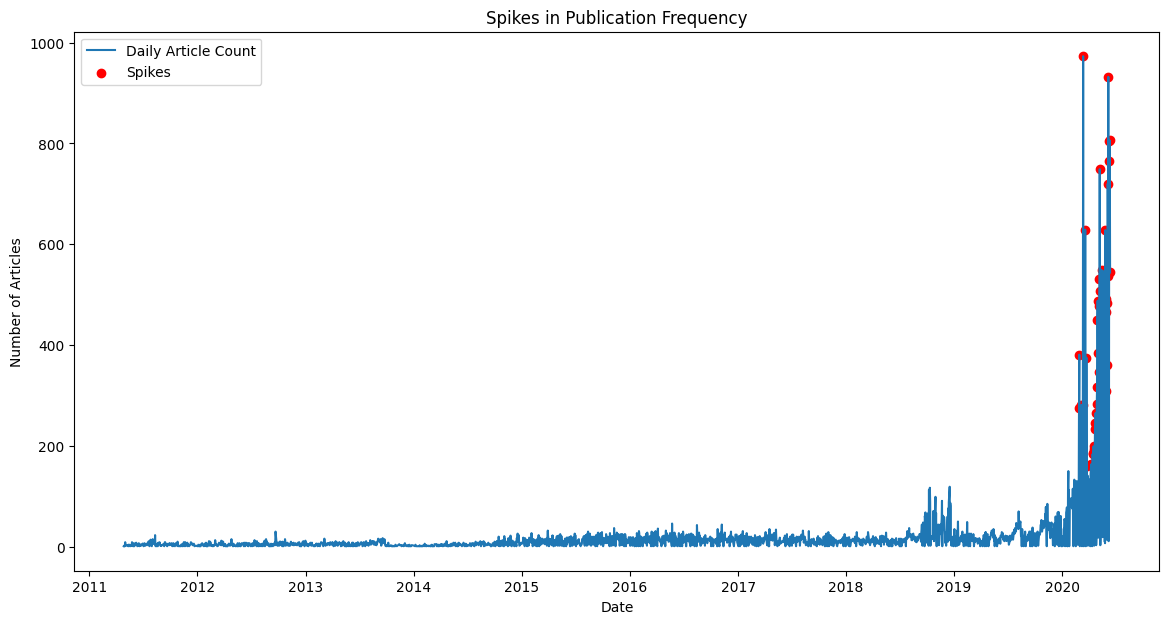

In [24]:
# Identify spikes using a threshold
threshold = daily_counts.mean() + 2*daily_counts.std()  # Example threshold
spikes = daily_counts[daily_counts > threshold]

plt.figure(figsize=(14, 7))
plt.plot(daily_counts, label='Daily Article Count')
plt.scatter(spikes.index, spikes.values, color='red', label='Spikes')
plt.title('Spikes in Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

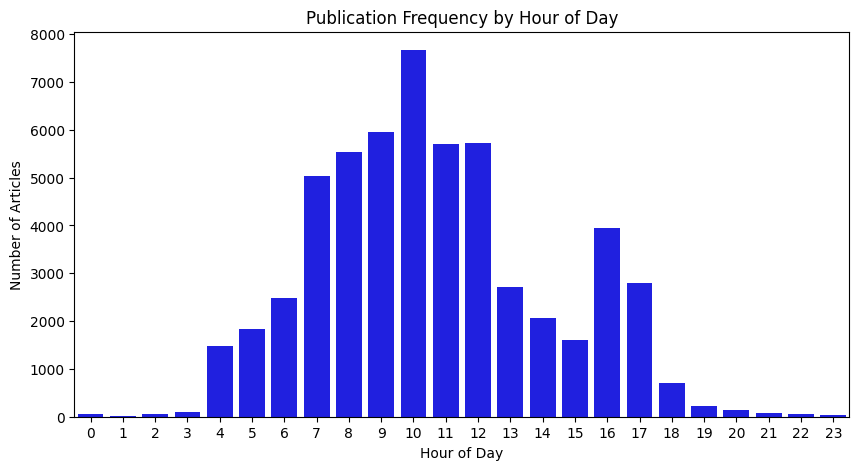

In [25]:
# Analyze hourly distribution of publications
df['hour'] = df['date'].dt.hour
hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='blue')
plt.title('Publication Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

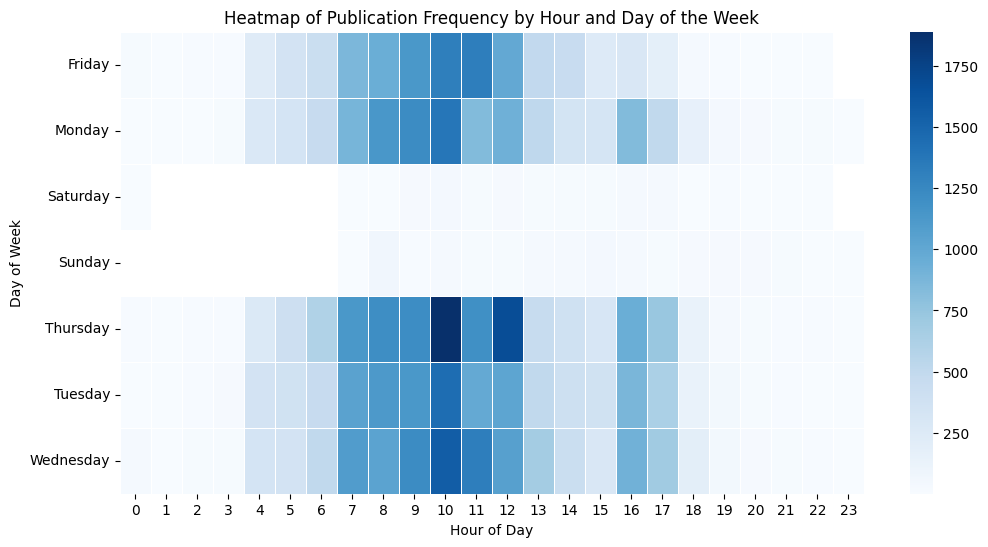

In [26]:
# Heatmap of hourly distribution by day of the week
df['day_of_week'] = df['date'].dt.day_name()
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5, annot=False)
plt.title('Heatmap of Publication Frequency by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

* Publisher Analysis:
Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

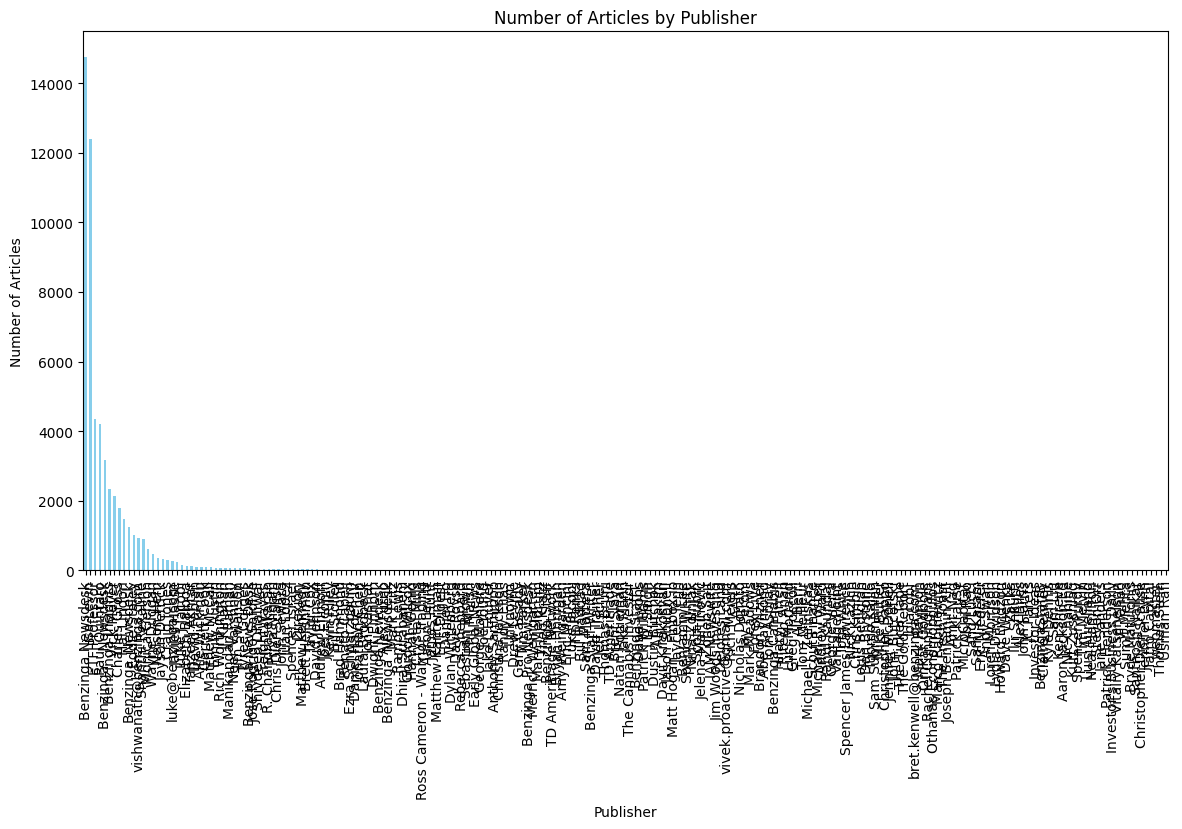

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('raw_analyst_ratings.csv')

# Count the number of articles contributed by each publisher
publisher_counts = df['publisher'].value_counts()

# Plot the number of articles contributed by each publisher
plt.figure(figsize=(14, 7))
publisher_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

In [28]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length', 'day_of_week', 'Sentiment_Scores', 'Sentiment',
       'Sentiment_Category', 'hour'],
      dtype='object')


<Figure size 1400x700 with 0 Axes>

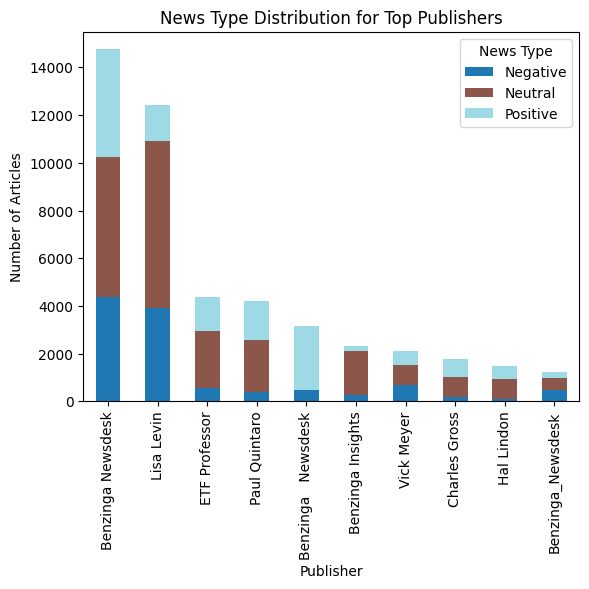

In [29]:
# Is There a Difference in the Type of News Reported by Each Publisher?
# Example column 'type' for type of news
# Group by publisher and type of news to see the distribution
publisher_news_types = df.groupby('publisher')['Sentiment_Category'].value_counts().unstack().fillna(0)

# Plot the distribution of news types for top publishers
top_publishers = publisher_counts.head(10).index
filtered_data = publisher_news_types.loc[top_publishers]

plt.figure(figsize=(14, 7))
filtered_data.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('News Type Distribution for Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.legend(title='News Type')
plt.show()

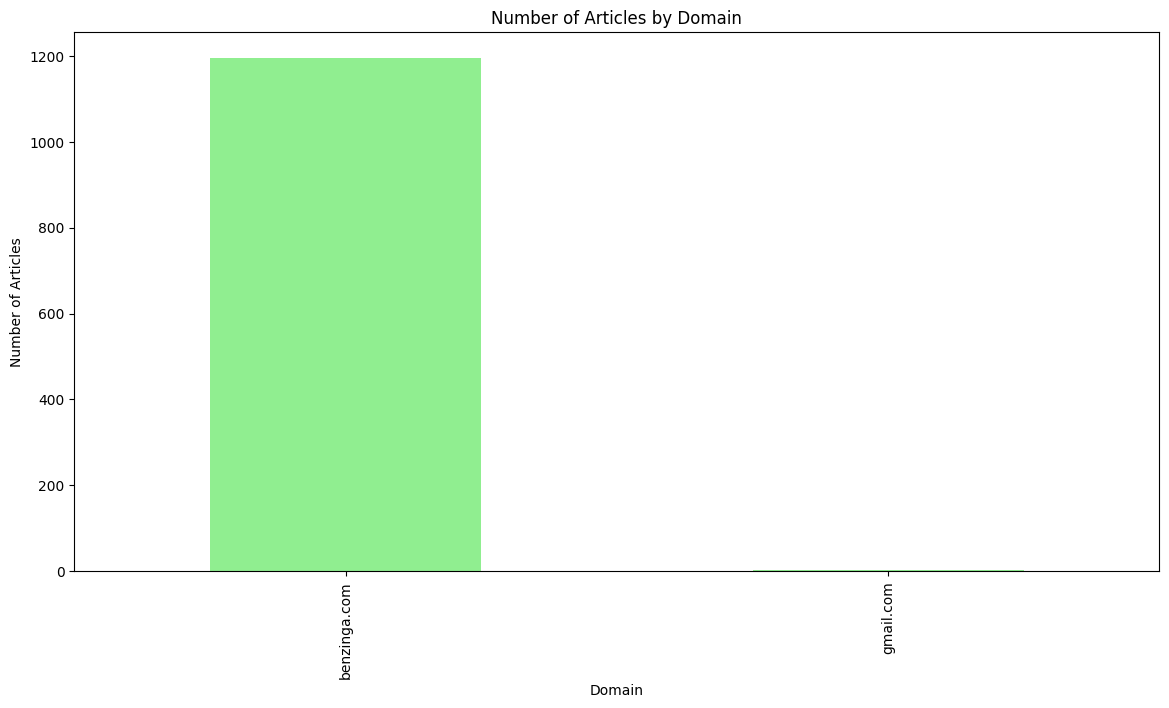

In [30]:
# Extract domains from email addresses
df['domain'] = df['publisher'].str.split('@').str[1]

# Count the number of articles contributed by each domain
domain_counts = df['domain'].value_counts()

# Plot the number of articles contributed by each domain
plt.figure(figsize=(14, 7))
domain_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Articles by Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()